In [1]:
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# data = pd.read_csv("./red-wine.csv")
# features = ["pH", "chlorides", "density", "residual sugar", "alcohol", "total sulfur dioxide"]
# X = data[features]
# y = data.quality
# length = len(features)
# model = keras.Sequential([
#     keras.layers.Dense(units=30, activation='relu', input_shape=[length]),
#     keras.layers.Dense(units=25, activation='relu'),
#     keras.layers.Dense(units=1)
# ])
# model.compile(loss="mse")

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# score = mean_absolute_error(y_test.to_numpy(), y_pred)
# print(score)

In [2]:
# sns.scatterplot(y_pred)
# sns.scatterplot(y_test.to_numpy())

In [22]:
import numpy

data = pd.read_csv("./housing.csv")
data.info()

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']
X = data[features]
y = data['MedHouseVal']

length = len(features)

model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_shape=[length]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='softmax'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='softmax'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mae')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

history = model.fit(  
            X_train, y_train, 
            validation_data=(X_test, y_test),
            batch_size=128,
            epochs=100)
# y_pred = model.predict(X_test)

# score = mean_squared_error(y_test.to_numpy(), y_pred)
# print(score)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20640 non-null  int64  
 1   MedInc       20640 non-null  float64
 2   HouseAge     20640 non-null  float64
 3   AveRooms     20640 non-null  float64
 4   AveBedrms    20640 non-null  float64
 5   Population   20640 non-null  float64
 6   AveOccup     20640 non-null  float64
 7   Latitude     20640 non-null  float64
 8   Longitude    20640 non-null  float64
 9   MedHouseVal  20640 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.6 MB
Epoch 1/100
146/146 [==============================] - 6s 10ms/step - loss: 1.7667 - val_loss: 0.9823
Epoch 2/100
146/146 [==============================] - 1s 9ms/step - loss: 1.1987 - val_loss: 0.8996
Epoch 3/100
146/146 [==============================] - 1s 7ms/step - loss: 1.0340 - val_loss: 0.8973
Epoch 4/100
146/146 [============

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1024      
                                                                 
 batch_normalization_38 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                      

<Axes: >

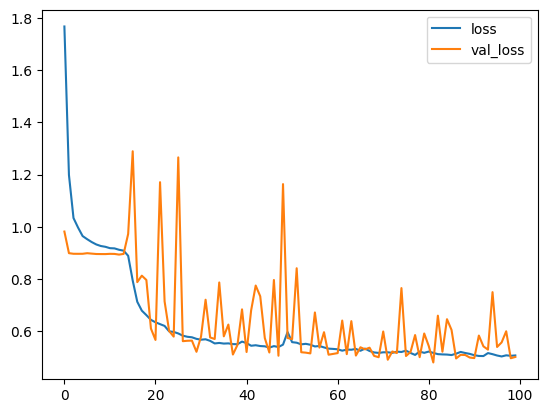

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()